# Problems 3 - Polynomial and Logistic Regression

## Polynomial Regression

Suppose you are given the following samples for a problem:

In [0]:
import numpy as np

feat = np.array([ 3.69, -0.01,  3.92,  3.76,  4.77,  2.65, -3.2 , -3.68,  4.84,
        2.35, -3.46,  3.36,  0.05, -2.43,  4.5 ,  2.99, -4.58, -2.38,
        4.75, -0.99,  2.43,  1.03, -0.91,  0.49, -1.07, -4.56,  2.7 ,
       -1.89, -4.46, -3.22,  4.11, -1.4 , -2.15, -3.08,  1.22,  4.15,
       -3.32, -0.96,  2.28, -0.22,  1.63, -3.16,  0.57,  1.12,  0.46,
       -4.42, -1.98, -4.59, -3.27,  3.77])

out = np.array([ -4.01526321,   4.91472839,  -6.45656423,  -2.62612898,
        -8.51413128,   3.34151409,  12.88771229,  34.65904607,
       -13.35431265,   4.30981981,  21.88485042,   1.12385015,
        -2.91774249,  14.50057692,  -1.24198533,  -4.55757528,
        45.46247156,   8.26033485, -17.30334323,  -9.70654351,
       -11.24523311, -10.24578944,   2.52139723,   9.46442395,
        -2.6732785 ,  47.77493771,  -1.3560507 ,  -3.87657515,
        47.12672411,  19.07990287,  -0.9455647 ,   0.35427309,
         9.80390966,  19.42353943,   3.11970979,   3.44865065,
        21.42035593,  -7.88242488,   5.64544367,  10.20227577,
        -0.62195752,  14.75901715,   9.12831525,   7.21057155,
         4.53708356,  45.98559999,  -3.86594125,  50.79311745,
        25.99250789,  -3.46524068])

Let's make a plot of the above samples

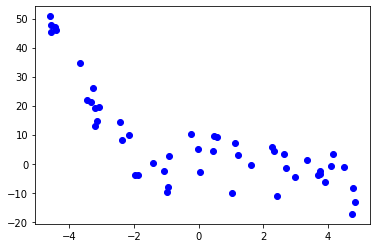

In [2]:
import matplotlib.pyplot as plt

plt.plot(feat, out, 'bo')

This is the gradient descent function we have been using until now, let's define it again:

In [0]:
def GradientDescent_np(X, y, max_iterations=100, alpha=1):
    m = X.shape[0] # number of samples
    J = np.zeros(max_iterations)

    # y must be a column vector of shape m x 1
    y = y.reshape(m, 1)
    
    #initialize the parameters to zero
    theta = np.zeros(shape=(X.shape[1], 1))
    
    # Repeat for max_iterations (it would be nice to also check convergence...)
    for iteration in range(max_iterations):
        grad = np.dot(X.T , (np.dot(X,theta) - y)) / m;
        theta = theta - alpha*grad
        J[iteration] = sum( (np.dot(X,theta) - y)**2)/m
    return [theta, J]

In order to use the linear gradient descent above to fit a polynomial, what we have to do is generate new features, from the existing ones. For example we could generate a new feature $feat_2$ and calculate its values as the square of $feat$: $feat_2 = feat^2$.

Similarly we could create more new features like:

$feat_3 = feat^3$

$feat_4 = feat^4$

$...$

Let's create such new features up to the power of 4. Here we take a very inefficient, explicit route, see the function MapFeatures defined further below for a way to automate this process.

In [0]:
#Create a new feature which is the feat raised to the power of two
feat2 = feat ** 2
feat3 = feat ** 3
feat4 = feat ** 4

#prepare the design matrix, starting with a column of ones (this is the x_0 for the bias term), and concatenating the size and rooms features
X = np.concatenate( (np.ones(shape=(feat.shape[0], 1)), feat.reshape(feat.shape[0], 1), \
                    feat2.reshape(feat2.shape[0], 1), feat3.reshape(feat3.shape[0], 1), \
                    feat4.reshape(feat4.shape[0], 1)), axis=1)

# Scale features and set them to zero mean (standarize)
mu = np.mean(X, 0) #calculate the mean for every column
sigma = np.std(X, 0, ddof=1) #calculate the standard deviation for every column

#normalize everything except X0 (the artificial first feature that we set to ones)
X[:,1] = (X[:,1] - mu[1]) / sigma[1];
X[:,2] = (X[:,2] - mu[2]) / sigma[2];
X[:,3] = (X[:,3] - mu[3]) / sigma[3];
X[:,4] = (X[:,4] - mu[4]) / sigma[4];

Let's now use our gradient descent function to fit a 2-degree polynomial model to the same data. To do this, we should pass to the function the set of features up to the power of 2: `[1, feat, feat2]`

theta result:[[  7.84509192]
 [-13.60627612]
 [  7.01751284]]


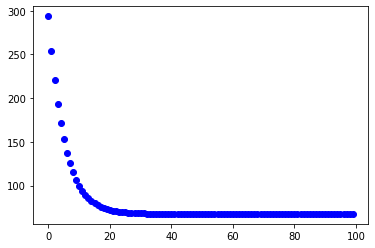

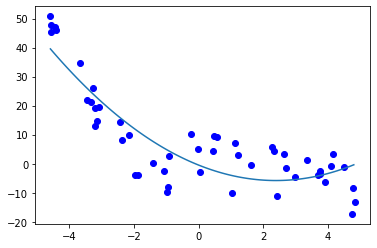

In [10]:
[theta, J] = GradientDescent_np(X[:,0:3], out, alpha=0.1)
print('theta result:{0}'.format(theta))

#Plot the evolution of the cost
plt.plot(np.arange(len(J)), J, 'bo')

# Plot line y = theta_0 + theta_1 * x + theta_2 * x^2
plt.figure()
plt.plot(feat, out, 'bo')
xx = np.arange(min(feat),max(feat), 0.1)
yy = [theta[0] + theta[1] * (x-mu[1])/sigma[1] + theta[2] * (x**2-mu[2])/sigma[2] for x in xx]
plt.plot(xx,yy)

<font color=blue>What is the final cost value of the above fit?</font>

In [11]:
#Your Code Here#
print(J[-1])


67.55822307549252


<font color=blue>Can you fit a 3-degree polynomial and a 4-degree polynomial? What is the final cost value in these cases?</font>

3-degree polynomial:

theta result:[[  7.84509192]
 [ -2.76031548]
 [  7.39547525]
 [-12.08292218]]
Final cost =  32.71220438060805


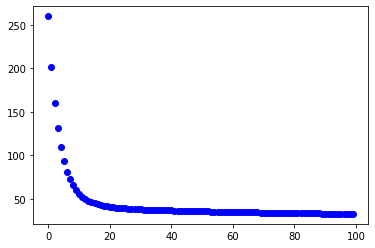

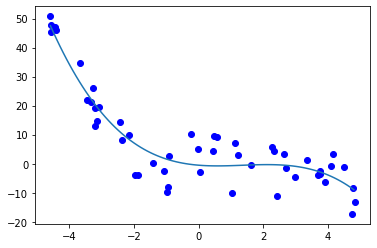

In [37]:
#Your Code Here#
degree = 3
def yy_output(theta,x,mu,sigma,degree):
  yy_value = 0
  yy_value += theta[0]
  for i in range(degree):
    yy_value += (theta[i+1] * (x**(i+1)-mu[i+1])/sigma[i+1])
  return yy_value

[theta, J] = GradientDescent_np(X[:,0:(degree+1)], out, alpha=0.1)
print('theta result:{0}'.format(theta))

#Plot the evolution of the cost
plt.plot(np.arange(len(J)), J, 'bo')

# Plot line y = theta_0 + theta_1 * x + theta_2 * x^2
plt.figure()
plt.plot(feat, out, 'bo')
xx = np.arange(min(feat),max(feat), 0.1)
yy = [yy_output(theta,x,mu,sigma,degree) for x in xx]

plt.plot(xx,yy)

print("Final cost = ", J[-1])


4-degree polynomial:

theta result:[[  7.84509192]
 [ -2.72199217]
 [  4.64446176]
 [-12.20870513]
 [  2.81869134]]
Final cost =  32.65888492403257


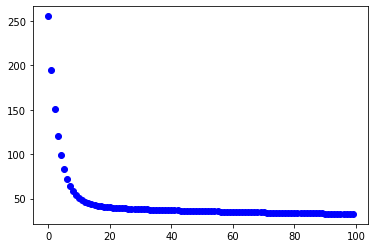

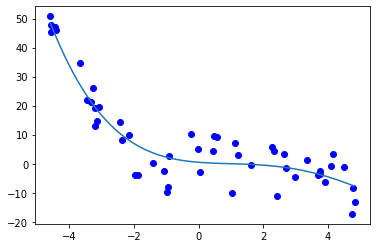

In [38]:
#Your Code Here#
degree = 4
def yy_output(theta,x,mu,sigma,degree):
  yy_value = 0
  yy_value += theta[0]
  for i in range(degree):
    yy_value += (theta[i+1] * (x**(i+1)-mu[i+1])/sigma[i+1])
  return yy_value

[theta, J] = GradientDescent_np(X[:,0:(degree+1)], out, alpha=0.1)
print('theta result:{0}'.format(theta))

#Plot the evolution of the cost
plt.plot(np.arange(len(J)), J, 'bo')

# Plot line y = theta_0 + theta_1 * x + theta_2 * x^2
plt.figure()
plt.plot(feat, out, 'bo')
xx = np.arange(min(feat),max(feat), 0.1)
yy = [yy_output(theta,x,mu,sigma,degree) for x in xx]

plt.plot(xx,yy)

print("Final cost = ", J[-1])

## Logistic Regression

We are going train a binary classifier using the Logistic Regression model: $h_\theta(\textbf{x}) = \frac{1}{1+e^{-\theta^\intercal \textbf{x}}}$

For this we need to fit the parameters $\theta$ to our dataset by minimizing the cost function $J$:

$\hat{\theta} = \underset{\theta}{\text{minimize}} {1 \over m} \sum_{i=1}^m{-y^{(i)}\log(h_\theta(x^{(i)}) - (1-y^{(i)})\log(1-h_\theta(x^{(i)})}$

where $(x^{(i)},y^{(i)})$ is the i-th training sample, and $m$ is the number of samples in the training set.

We are going to use the Gradient Descent algorithm to solve this minimization problem, in pseudo-code:

repeat until convergence (or max. number of iterations) 

{

$\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta)$ (for all j)

}

where $\alpha$ is the learning rate, and the partial derivative (the gradient) of the cost function is given by:

$\frac{\partial}{\partial \theta_j} J(\theta) = {1 \over m} \sum_{i=1}^m{(h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)}}$

Notice that the partial derivative of our cost function has the same form as for the Linear Regression cost function, however the difference is in the term $h_\theta(\textbf{x})$, our model. In the case of Logistic Regression $h_\theta(\textbf{x})$ is the sigmoid function of $\theta^\intercal \textbf{x}$.

Thus, the Python code of our **GradientDescent** function is going to be quite the same as for Linear Regression, but calling the **sigmoid** function to evaluate the Logistic Regression model $h_\theta(\textbf{x})$.

In [1]:
import numpy as np

def sigmoid(X):
    '''
    Computes the Sigmoid function of the input argument X.
    '''
    return 1.0/(1+np.exp(-X))


def GradientDescent_logistic(x,y,max_iterations=2500, alpha=0.1):
    
    m,n = x.shape # number of samples, number of features

    # y must be a column vector
    y = y.reshape(m,1)
    
    #initialize the parameters
    theta = np.ones(shape=(n,1)) 
    
    # Repeat until convergence (or max_iterations)
    for iteration in range(max_iterations):
        h = sigmoid(np.dot(x,theta))
        error = (h-y)
        gradient = np.dot(x.T , error) / m
        theta = theta - alpha*gradient
    return theta


def classifyVector(X, theta):
    '''
    Evaluate the Logistic Regression model h(x) with theta parameters,
    and returns the predicted label of x.
    '''
    prob = sigmoid(sum(np.dot(X,theta)))
    if prob > 0.5: return 1.0
    else: return 0.0

Let's see how to use this code in a synthetic dataset. First load the data and plot it.

In [2]:
# Load the synthetic dataset

import pickle

with open('./Log_data.pkl', 'rb') as f:
    (X,y) = pickle.load(f, encoding='latin1')

print (X.shape)
print (y.shape)

(117, 2)
(117,)


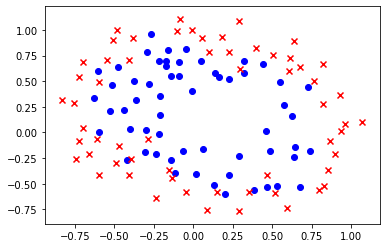

In [3]:
# Plot the data

%matplotlib inline 
import matplotlib.pyplot as plt

plt.scatter(X[y==1, 0], X[y==1, 1], marker='o', c='b') #positive samples
plt.scatter(X[y==0, 0], X[y==0, 1], marker='x', c='r') #negative samples
plt.show()

Now, we train the Logistic Regression classifier and draw its decision boundary in a 2D plot.

Training Accuracy : 0.5470085470085471


<a list of 1 text.Text objects>

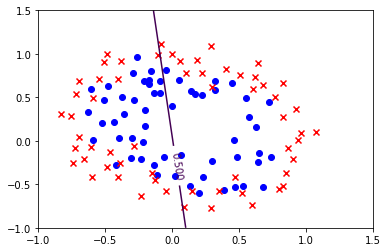

In [4]:
# Append the x_0 column (for the bias term theta_0)
x = np.ones(shape=(X.shape[0], 1))
x = np.append(x,X,axis=1)

#Logistic Regression gradient descent optimization
w = GradientDescent_logistic(x,y)

#Evaluate the classifier accuracy in the training data
H = [classifyVector(x[i,:],w) for i in range(x.shape[0])]
print ("Training Accuracy : {0}".format(str(float(np.sum(H == y)) / y.shape[0])))

#Plot data
plt.scatter(X[y==1, 0], X[y==1, 1], marker='o', c='b') #positive samples
plt.scatter(X[y==0, 0], X[y==0, 1], marker='x', c='r') #negative samples

#Plot Decision Boundary
u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)
z = np.zeros(shape=(len(u), len(v)))
for i in range(len(u)):
    for j in range(len(v)):
        z[i, j] = sigmoid(np.dot(np.array([1,u[i],v[j]]),w))

z = z.T

cs = plt.contour(u, v, z, levels=[0.5])
plt.clabel(cs, inline=1, fontsize=10)

As can be seen in the previous plot the classification boundary with 2 features fits very poorly our data.

One way to fit the data better is to create more features from each data point. We will map the features  into all polynomial terms of $x_1$ and $x_2$ up to the sixth power. 

$MapFeature(x_1,x_2) = [x_1,x_2,x_1^2,x_1x_2,x_2^2,x_1^3, \dots , x_1x_2^5, x_2^6]$

As a result of this mapping, our vector of two features is transformed into a 28-D vector. The Logistic Regression classifier trained on this high dimensional feature space will have a more complex decision boundary (i.e. more degrees of freedom) and will appear nonlinear when drawn in the 2D plot.

In [5]:
def map_feature(x1, x2, mu=np.array([]), sigma=np.array([]), degree = 6):
    '''
    Maps 2D features to quadratic features.
    Returns a new feature vector with more features, comprising of
    x1, x2, x1^2, x2^2, x1*x2, x1*x2^2, etc...
    '''
    
    x1.shape = (x1.size, 1)
    x2.shape = (x2.size, 1)
    out = np.ones(shape=(x1[:, 0].size, 1))
    
    for i in range(1, degree + 1):
        for j in range(i + 1):
            r = (x1 ** (i - j)) * (x2 ** j)
            out = np.append(out, r, axis=1)

    # Normalise the newly created features
    if (len(mu)==0): #calculate the mu and sigmas
        mu = np.mean(out, 0) #calculate the mean for every column
        sigma = np.std(out, 0, ddof=1) #calculate the standard deviation for every column

    # Scale features and set them to zero mean (standarize)
    # normalize everything except X0 (the artificial first feature that we set to ones)
    for i in range(1, out.shape[1]):
        out[:,i] = (out[:,i] - mu[i]) / sigma[i];

    return (out, mu, sigma)

In [6]:
deg = 6
(features, m, s) = map_feature(X[:,0], X[:,1], degree=deg)
print(features.shape)

(117, 28)


In [7]:
#Logistic Regression gradient descent optimization
w = GradientDescent_logistic(features,y)

H = [classifyVector(features[i,:],w) for i in range(features.shape[0])]
print ("Training Accuracy : {0}".format(str(float(np.sum(H == y)) / y.shape[0])))

Training Accuracy : 0.8461538461538461


<a list of 1 text.Text objects>

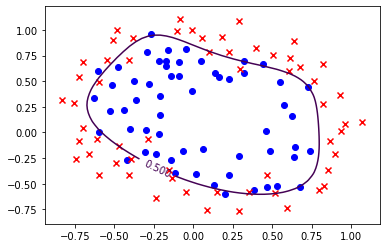

In [8]:
#Plot data
plt.scatter(X[y==1, 0], X[y==1, 1], marker='o', c='b') #positive samples
plt.scatter(X[y==0, 0], X[y==0, 1], marker='x', c='r') #negative samples

#Plot Boundary
u = np.linspace(np.min(X[:,0]), np.max(X[:,0]), 50)
v = np.linspace(np.min(X[:,1]), np.max(X[:,1]), 50)
z = np.zeros(shape=(len(u), len(v)))
for i in range(len(u)):
    for j in range(len(v)):
        z[i, j] = sigmoid(map_feature(np.array(u[i]),np.array(v[j]), mu = m, sigma = s, degree = deg)[0].dot(w))
        
z = z.T
cs = plt.contour(u, v, z, levels=[0.5])
plt.clabel(cs, inline=1, fontsize=10)


<font color=blue>Try generating a different number of features by changing the value of `deg` (e.g. features up to degree 1, 2, 3, ...15) and run the code above again for different degrees. What do you observe?

---

*Your answer here*



---


(117, 136)
Training Accuracy : 0.8974358974358975


<a list of 2 text.Text objects>

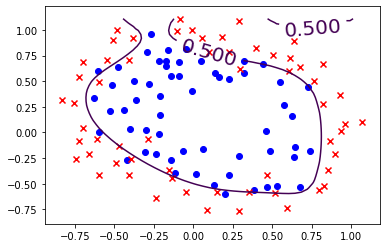

In [10]:
deg = 15
(features, m, s) = map_feature(X[:,0], X[:,1], degree=deg)
print(features.shape)

#Logistic Regression gradient descent optimization
w = GradientDescent_logistic(features,y)

H = [classifyVector(features[i,:],w) for i in range(features.shape[0])]
print ("Training Accuracy : {0}".format(str(float(np.sum(H == y)) / y.shape[0])))

#Plot data
plt.scatter(X[y==1, 0], X[y==1, 1], marker='o', c='b') #positive samples
plt.scatter(X[y==0, 0], X[y==0, 1], marker='x', c='r') #negative samples

#Plot Boundary
u = np.linspace(np.min(X[:,0]), np.max(X[:,0]), 50)
v = np.linspace(np.min(X[:,1]), np.max(X[:,1]), 50)
z = np.zeros(shape=(len(u), len(v)))
for i in range(len(u)):
    for j in range(len(v)):
        z[i, j] = sigmoid(map_feature(np.array(u[i]),np.array(v[j]), mu = m, sigma = s, degree = deg)[0].dot(w))
        
z = z.T
cs = plt.contour(u, v, z, levels=[0.5])
plt.clabel(cs, inline=1, fontsize=20)

When degree equals 6, the contour forms a circle. However, 
the contour does not form a circle when degree equals 15, which seems to be overfit.